# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [93]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [94]:
df= pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000, na_values = ["???", "Unknown", "UNKNOWN"])
df = df.head(30000)
df.head(5)


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

In [4]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
#animal name measn for example tiger
#animal birth is the date that this animal was born. 

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [6]:
#Errors IGNORE ERRORS and convert the file

In [7]:
#What is the color of the most dogs?
#How maney dogs are vaccinated?
#What is the most common breed?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

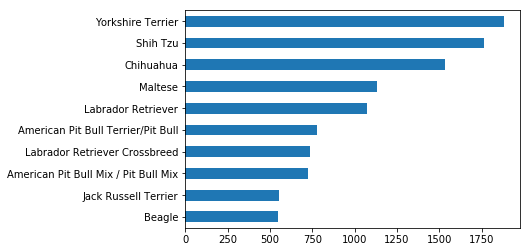

In [8]:
df['Primary Breed'].value_counts(ascending = True).tail(10).plot(kind='barh')

In [9]:
#df.ABV.astype(float)

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

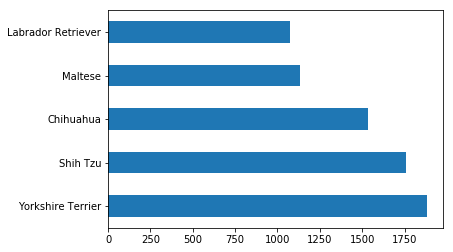

In [10]:
#Get rid of dogs with an unknown 
dogs_not_unknown = df[df['Primary Breed'] != 'Unknown']
#This graph the remainly dogs
dogs_not_unknown['Primary Breed'].value_counts().head().plot(kind='barh')

## What are the most popular dog names?

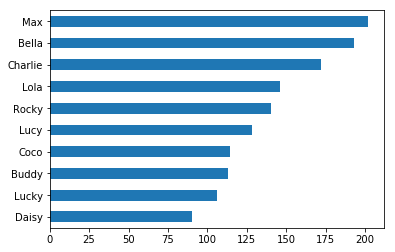

In [11]:
df['Animal Name'].value_counts(ascending = True).tail(10).plot(kind='barh')

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
#df[df['Secondary Breed'].str.contains("TER", na=False)] #gia search se string
df[df['Animal Name']=='Catherine'].shape
df[df['Animal Name']=='Max'].shape



(202, 15)

In [13]:
df[df['Animal Name']=='Max'].shape

(202, 15)

In [14]:
df[df['Animal Name']=='Maxwell'].shape

(11, 15)

In [15]:
df['Animal Third Color'].value_counts().head()

WHITE    1156
BLACK     926
White     675
BROWN     627
Black     521
Name: Animal Third Color, dtype: int64

In [16]:
#df['IBUs'].hist bins=29

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [78]:
#Thrird COLOR  
#df['Animal Third Color'].value_counts(dropna=False).head()

In [18]:
df[df['Guard or Trained']== 'Yes']['Guard or Trained'].value_counts(normalize=True)

Yes    1.0
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [19]:
df[df['Guard or Trained']== 'Yes']['Guard or Trained'].value_counts(dropna=False)

Yes    17
Name: Guard or Trained, dtype: int64

In [20]:
sum_trained = df['Guard or Trained'].value_counts(dropna=False)
17 / sum_trained.sum() * 100

0.05666666666666667

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [21]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [22]:
df['Guard or Trained'].fillna("No").value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [23]:
df[df['Guard or Trained']== 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Rottweiler                    1
Labrador Retriever            1
German Shepherd Crossbreed    1
Golden Retriever              1
Schnauzer, Miniature          1
Poodle, Standard              1
Doberman Pinscher             1
Shih Tzu                      1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [24]:
df['year'] = df['Animal Birth'].apply(lambda birth:birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [25]:
df['age'] = 2017 - df['year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3


# Joining data together

In [26]:
df_zipcodes = pd.read_csv("zipcodes-neighborhoods.csv")
df_zipcodes


,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
5,Bronx Park and Fordham,10468,Bronx
6,High Bridge and Morrisania,10451,Bronx
7,High Bridge and Morrisania,10452,Bronx
8,High Bridge and Morrisania,10456,Bronx
9,Hunts Point and Mott Haven,10454,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [27]:
combined_df = df.merge(df_zipcodes, left_on="Owner Zip Code", right_on="zip")
combined_df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,NaN,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [28]:
Bronx_df = combined_df[combined_df['borough']=='Bronx']
Bronx_df
Bronx_df["Animal Name"].value_counts().head(1)

Bella    22
Name: Animal Name, dtype: int64

In [29]:
Brooklyn_df = combined_df[combined_df['borough']=='Brooklyn']
Brooklyn_df
Brooklyn_df["Animal Name"].value_counts().head(1)

Max    46
Name: Animal Name, dtype: int64

In [30]:
Upper_df = combined_df[combined_df['neighborhood']=='Upper East Side']
Upper_df
Upper_df["Animal Name"].value_counts().head(1)

Charlie    19
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [31]:
combined_df.groupby('borough')["Primary Breed"].value_counts().groupby(level=0).head(1)

borough        Primary Breed    
Bronx          Yorkshire Terrier    250
Brooklyn       Yorkshire Terrier    501
Manhattan      Chihuahua            511
Queens         Yorkshire Terrier    434
Staten Island  Yorkshire Terrier    171
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [89]:
breeds = df['Primary Breed'].value_counts(ascending=False)
not_fixed = df[df['Spayed or Neut']== 'No']
not_fixed['Primary Breed'].value_counts(ascending=False)
not_fixed1 = not_fixed['Primary Breed'].value_counts(ascending=False) / df['Primary Breed'].value_counts(ascending=False)
not_fixed1.dropna().sort_values(ascending=False)

Polish Hound                           1.000000
Treeing Tennessee Brindle              1.000000
Mudi                                   1.000000
Mastiff, Tibetan                       1.000000
Borzoi                                 1.000000
Canaan Dog                             1.000000
Mastiff, French (Dogue de Bordeaux)    1.000000
Dogo Argentino                         1.000000
Kooikerhondje                          1.000000
Karelian Bear Dog                      1.000000
Fila Brasileiro                        1.000000
French Spaniel                         1.000000
Lagotto Romagnolo                      0.666667
Greater Swiss Mountain Dog             0.666667
American Bully                         0.647059
Morkie                                 0.606061
Affenpinscher                          0.600000
Miniature American Shepherd            0.571429
Maltipoo                               0.538462
Shih Tzu Crossbreed                    0.519685
English Setter                         0

In [91]:
not_fixed["Animal Gender"].value_counts(ascending=False)

M    3384
F    1953
Name: Animal Gender, dtype: int64

In [92]:
#df[df['Spayed or Neut']== 'No']["Animal Gender"].value_counts()

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [34]:
colors = ["BLACK", "BROWN", "GREY", "black", "grey", "white"]
df['Monochrome'] = df['Animal Secondary Color'].isnull() & df['Animal Dominant Color'].isin(colors) 
df['Monochrome'].value_counts()[True]

1624

## How many dogs are in each borough? Plot it in a graph.

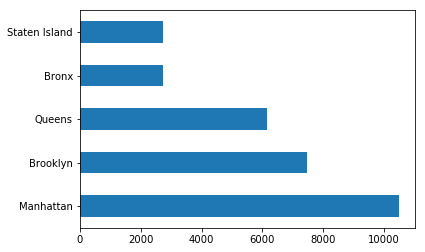

In [35]:
combined_df['borough'].value_counts().groupby(level=0).head(1).plot(kind="barh")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [36]:
df_pop = pd.read_csv("boro_population.csv")
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [37]:
df_combined2 = combined_df.merge(df_pop, left_on="borough", right_on="borough")
#df_combined2

In [38]:
combined_df.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [39]:
df_pop.set_index("borough")["population"]

borough
Manhattan        1644518
Bronx            1455444
Brooklyn         2636735
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

In [40]:
combined_df.borough.value_counts() / df_pop.set_index("borough")["population"] * 100

Bronx            0.188808
Brooklyn         0.283153
Manhattan        0.637147
Queens           0.263087
Staten Island    0.574640
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

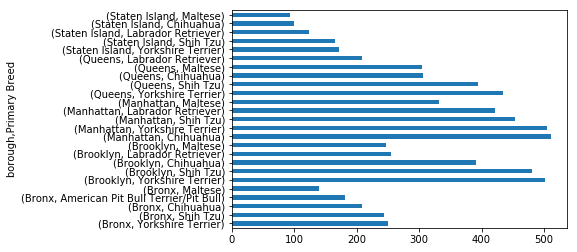

In [47]:
combined_df.groupby('borough')["Primary Breed"].value_counts().groupby(level=0).head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [59]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64